In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u

%config InlineBackend.figure_format = 'retina'

In [2]:
# ddt model
summa_model_ddt  = '../models/merger_2012_11_09_spectra_gamma.dat'

In [3]:
hesma_model  = pd.read_csv(summa_model_ddt, sep='\s+')
hesma_model.set_index(hesma_model.columns[0], inplace=True)

In [4]:
hesma_model.columns

Index(['6.16', '6.39', '6.63', '6.88', '7.14', '7.41', '7.69', '7.98', '8.28',
       '8.59', '8.91', '9.25', '9.59', '9.95', '10.33', '10.71', '11.12',
       '11.54', '11.97', '12.42', '12.88', '13.37', '13.87', '14.39', '14.93',
       '15.49', '16.08', '16.68', '17.31', '17.96', '18.63', '19.33', '20.06',
       '20.81', '21.59', '22.41', '23.25', '24.12', '25.03', '25.97', '26.94',
       '27.96', '29.01', '30.10', '31.23', '32.40', '33.62', '34.88', '36.19',
       '37.55', '38.96', '40.43', '41.95', '43.52', '45.16', '46.86', '48.62',
       '50.44', '52.34', '54.30', '56.35', '58.46', '60.66', '62.94', '65.30',
       '67.76', '70.30', '72.94', '75.69', '78.53', '81.48', '84.54', '87.72',
       '91.01', '94.43', '97.98', '101.66'],
      dtype='object')

In [5]:
#spectrum_new_code_25_days = '../results/spectra_positronium_fraction_0.0_ddt_25d.csv'
#spectrum_new_code_50_days = '../results/spectra_positronium_fraction_0.0_ddt_50d.csv'
#spectrum_new_code_100_days = '../results/spectra_positronium_fraction_0.0_ddt_100d.csv'
# run this -->
spectrum_new_code_100_days = '../results/merger_2012_100d_500ts_7e7_log_ps0_escape_energy.csv'
#spectrum_new_code_100_days = '../results/escape_energy_positronium_fraction_1.0_ddt_n100_100d_500_new_run2_July01.csv'
#spectrum_new_code_100_days = '../results/escape_energy_positronium_fraction_0.0_ddt_n100_100d_100_new_shell_change.csv'

In [6]:
def lum_to_flux(lum):
    return lum / (4. * np.pi * (10.0 * u.pc).to("cm").value ** 2.0)

In [7]:
#spectrum_df_25_new = pd.read_csv(spectrum_new_code_25_days, sep='\s+')
#spectrum_df_50_new = pd.read_csv(spectrum_new_code_50_days, sep='\s+')
spectrum_df_100_new = pd.read_csv(spectrum_new_code_100_days, sep=',', index_col=0)

In [8]:
spectrum_df_100_new.head()

,172800.0,174157.29800771928,175525.25723003206,176903.9614079414,178293.49494021366,179693.94288854502,181105.39098276861,182527.9256261027,183961.63390043975,185406.6035716773,...,7989771.193080648,8052528.7192525305,8115779.189089007,8179526.474531369,8243774.477933966,8308527.132303099,8373788.401537802,8439562.280672468,8505852.79612142,8572664.005925408
100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.259725e+21,5.695936e+21,5.734387e+21,7.403670e+21,5.262024e+21,5.450140e+21,6.179879e+21,6.531386e+21,5.583193e+21,5.861285e+21
100.834051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.908991e+20,3.277242e+20,5.684749e+20,6.385024e+20,5.457365e+20,1.530829e+20,3.089588e+20,3.078593e+20,2.333526e+20,2.296829e+20
101.675058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.000998e+20,3.231737e+20,3.169004e+20,3.029961e+20,3.053020e+20,2.288589e+20,4.657997e+20,2.307023e+20,3.830736e+20,2.200896e+20
102.523080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.429972e+20,4.741443e+20,2.374981e+20,5.455713e+20,3.843809e+20,3.860499e+20,2.975438e+20,2.210557e+20,2.227989e+20,2.224155e+20
103.378174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.662790e+20,6.278791e+20,5.496976e+20,2.285286e+20,3.826177e+20,6.854377e+20,2.982956e+20,2.274355e+20,8.911118e+20,5.163923e+20


In [9]:
# 97.68
time_index_100 = spectrum_df_100_new.columns.shape[0] - 3
spectra_df_100 = pd.DataFrame({'energy_keV': spectrum_df_100_new.index, 'lum_density': spectrum_df_100_new.iloc[:,time_index_100]})

In [10]:
# 97.68
spectrum_df_100_new.columns.values.astype(float)[-3] / 86400

97.68011898926468

In [11]:
# 50.23
spectrum_df_100_new.columns.values.astype(float)[412] / 86400

50.232093593400904

In [12]:
# 25.04
spectrum_df_100_new.columns.values.astype(float)[323] / 86400

25.035981298216946

In [13]:
time_index_50 = spectrum_df_100_new.columns.shape[0] - 88
spectra_df_50 = pd.DataFrame({'energy_keV': spectrum_df_100_new.index, 'lum_density': spectrum_df_100_new.iloc[:,time_index_50]})

In [14]:
time_index_25 = spectrum_df_100_new.columns.shape[0] - 177
spectra_df_25 = pd.DataFrame({'energy_keV': spectrum_df_100_new.index, 'lum_density': spectrum_df_100_new.iloc[:,time_index_25]})

In [15]:
# spectrum at 25 days
spectra_df_25['flux'] = spectra_df_25['lum_density'].map(lum_to_flux)
spectra_df_25['energy_MeV'] = spectra_df_25['energy_keV'] * 0.001


In [16]:
# spectrum at 50 days
spectra_df_50['flux'] = spectra_df_50['lum_density'].map(lum_to_flux)
spectra_df_50['energy_MeV'] = spectra_df_50['energy_keV'] * 0.001

In [17]:
# spectrum at 100 days
spectra_df_100['flux'] = spectra_df_100['lum_density'].map(lum_to_flux)
spectra_df_100['energy_MeV'] = spectra_df_100['energy_keV'] * 0.001

Text(0.21, 0.8, '270 keV')

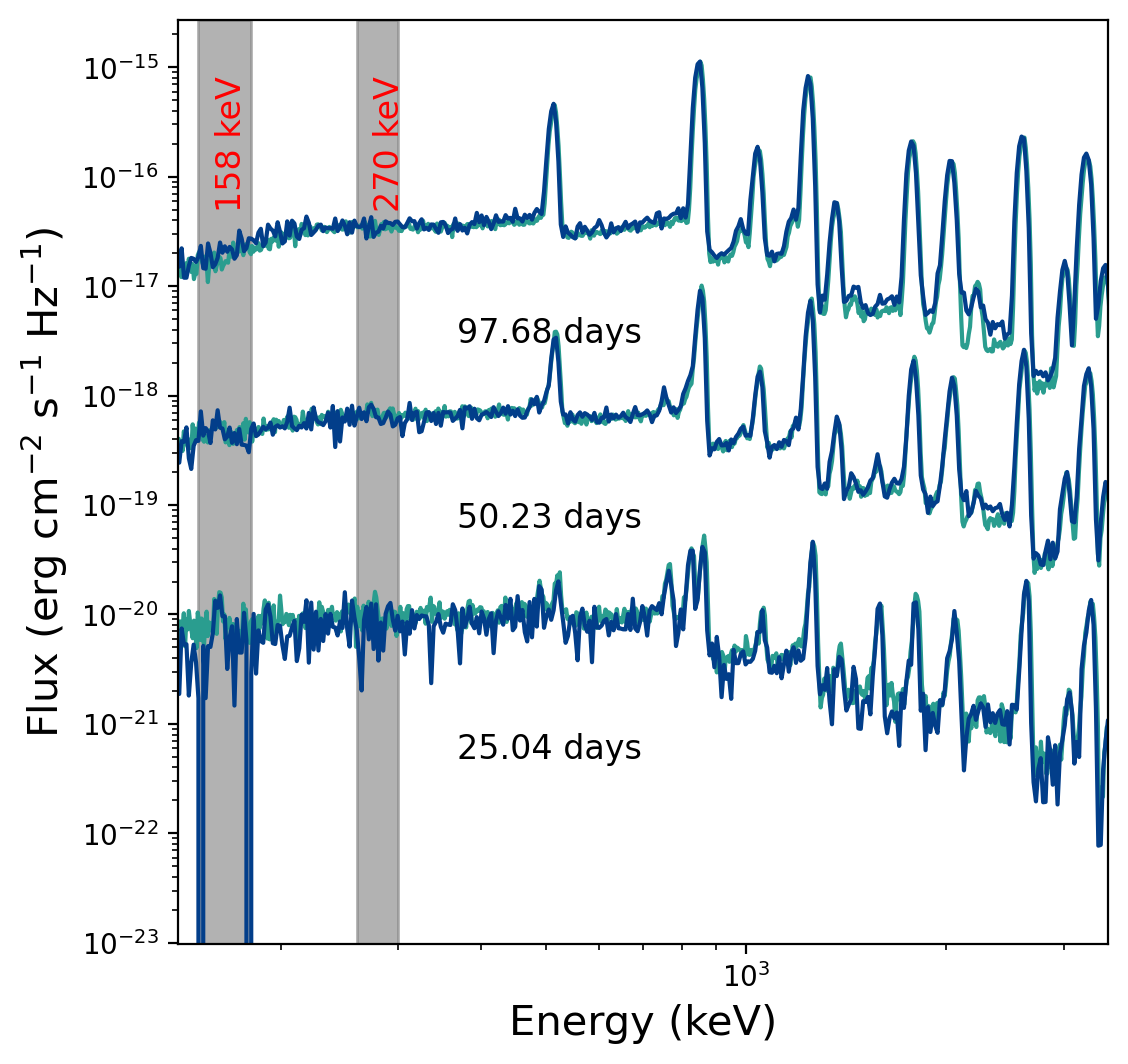

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(hesma_model.index * 1000, hesma_model['25.03']* 0.1, label='HESMA', color='#2a9d8f')
ax.plot(spectra_df_25['energy_keV'], spectra_df_25['flux'] * 0.1, label='New Code', color='#023e8a', linestyle='-')

ax.plot(hesma_model.index * 1000, hesma_model['50.44'] * 3, color='#2a9d8f', linestyle='-')
ax.plot(spectra_df_50['energy_keV'], spectra_df_50['flux'] * 3, color='#023e8a', linestyle='-')

ax.plot(hesma_model.index * 1000, hesma_model['97.98'] * 200, color='#2a9d8f', linestyle='-')
ax.plot(spectra_df_100['energy_keV'], spectra_df_100['flux'] * 200, color='#023e8a', linestyle='-')

ax.set_xlabel('Energy (keV)', fontsize=15)
ax.set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)', fontsize=15)

ax.text(0.3, 0.2, '25.04 days', transform=ax.transAxes, fontsize=12)
ax.text(0.3, 0.45, '50.23 days', transform=ax.transAxes, fontsize=12)
ax.text(0.3, 0.65, '97.68 days', transform=ax.transAxes, fontsize=12)

plt.xscale('log')
plt.yscale('log')
#plt.xlim(2.0, 3.5)


plt.xlim(140, 3500)

plt.axvspan(150, 180, alpha=0.6, color='grey')
plt.axvspan(260, 300, alpha=0.6, color='grey')

ax.text(0.04, 0.80, '158 keV', transform=ax.transAxes, fontsize=12, color='red', rotation='vertical')
ax.text(0.21, 0.80, '270 keV', transform=ax.transAxes, fontsize=12, color='red', rotation='vertical')

#plt.savefig('../plots/tardis_hesma_comparison_ddt.png', dpi=300, bbox_inches='tight')